<a href="https://colab.research.google.com/github/seneca-m/DataProcessing-PythonDevelopment-Pandas/blob/main/Assignment15.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Loan Default Prediction**

**Imports and Setup**

In [3]:
from google.colab import files
uploaded = files.upload()

Saving bank-loan.csv to bank-loan.csv


In [4]:
# Get the name of the uploaded file
file_name = list(uploaded.keys())[0]

try:
    df = pd.read_csv(file_name)
    print(f"DataFrame '{file_name}' loaded successfully!")
    print(df.head())
except Exception as e:
    print(f"Error reading CSV file '{file_name}': {e}")
    print("Please ensure you uploaded the correct CSV file.")

DataFrame 'bank-loan.csv' loaded successfully!
   age  ed  employ  address  income  debtinc   creddebt   othdebt  default
0   41   3      17       12     176      9.3  11.359392  5.008608      1.0
1   27   1      10        6      31     17.3   1.362202  4.000798      0.0
2   40   1      15       14      55      5.5   0.856075  2.168925      0.0
3   41   1      15       14     120      2.9   2.658720  0.821280      0.0
4   24   2       2        0      28     17.3   1.787436  3.056564      1.0


In [5]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Install Fairlearn and SHAP
# These installations are required for Task 4
print("Installing fairlearn...")
!pip install fairlearn
print("Installing shap...")
!pip install shap
print("Installations complete.")

# Confirm imports after installation
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from fairlearn.metrics import MetricFrame, selection_rate, false_positive_rate, true_positive_rate
import shap
import lime
import lime.lime_tabular # Ensure lime.lime_tabular is imported for LIME explainer

# Set random seed for reproducibility
np.random.seed(42)

Installing fairlearn...
Installing shap...
Installations complete.


In [1]:
# Due to error above, installing Lime to import
!pip install lime
print("Installations complete.")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 5.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=c4eb9a07855b5c25eab177c105899894cbf977b861db76410d9caf9c4628009e
  Stored in directory: /root/.cache/pip/wheels/85/fa/a3/9c2d44c9f3cd77cf4e533b58900b2bf4487f2a17e8ec212a3d
Successfully built lime
Installations complete.


In [3]:
!pip install fairlearn
print("Installing shap...")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.0/240.0 kB 3.8 MB/s eta 0:00:00
Installing shap...


In [6]:
# Confirm imports after installation
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from fairlearn.metrics import MetricFrame, selection_rate, false_positive_rate, true_positive_rate
import shap
import lime
import lime.lime_tabular

# Set random seed for reproducibility
np.random.seed(42)

# **Task 1: Data Analysis and Cleaning**

In [7]:
# Define the path to CSV file on Google Drive
csv_file_path = '/content/drive/My Drive/bank-loan.csv'

In [10]:
from google.colab import drive
print("\nMounting Google Drive...")
drive.mount('/content/drive')
print("Google Drive mounted.")


Mounting Google Drive...
Mounted at /content/drive
Google Drive mounted.


In [11]:
# Check if the file exists before attempting to read
if not os.path.exists(csv_file_path):
    print(f"Error: CSV file not found at: {csv_file_path}")
    print("Please ensure 'bank-loan.csv' is uploaded to your Google Drive at the specified path.")
else:
    print(f"Loading data from: {csv_file_path}")
    df = pd.read_csv(csv_file_path)
    print("DataFrame loaded successfully!")

    print("\n--- Summary Statistics ---")
    print("\nDataFrame Info:")
    df.info() # Displays data types and non-null counts

    print("\nDescriptive Statistics (Numerical Features):")
    print(df.describe()) # Displays descriptive statistics for numerical columns

    print("\nValue Counts for Target Variable ('default'):")
    print(df['default'].value_counts())
    print(df['default'].value_counts(normalize=True)) # Percentage of defaults

Loading data from: /content/drive/My Drive/bank-loan.csv
DataFrame loaded successfully!

--- Summary Statistics ---

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       850 non-null    int64  
 1   ed        850 non-null    int64  
 2   employ    850 non-null    int64  
 3   address   850 non-null    int64  
 4   income    850 non-null    int64  
 5   debtinc   850 non-null    float64
 6   creddebt  850 non-null    float64
 7   othdebt   850 non-null    float64
 8   default   700 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 59.9 KB

Descriptive Statistics (Numerical Features):
              age          ed      employ     address      income     debtinc  \
count  850.000000  850.000000  850.000000  850.000000  850.000000  850.000000   
mean    35.029412    1.710588    8.565882    8.371765   46.675294   10.1716

In [13]:
# Handling Missing Values
print("\n--- Handling Missing Values ---")
print("Missing values before handling:")
print(df.isnull().sum()) # Check for missing values

df.replace('?', np.nan, inplace=True)
df.dropna(inplace=True)
print("\nMissing values after handling (if any):")
print(df.isnull().sum())


--- Handling Missing Values ---
Missing values before handling:
age           0
ed            0
employ        0
address       0
income        0
debtinc       0
creddebt      0
othdebt       0
default     150
dtype: int64

Missing values after handling (if any):
age         0
ed          0
employ      0
address     0
income      0
debtinc     0
creddebt    0
othdebt     0
default     0
dtype: int64


In [15]:
# Normalize Numerical Features
# Scaling will be done in Feature Engineering task to ensure consistency
# before splitting into train/test.

 **Visualizations**


--- Visualizations (Distributions and Relationships) ---


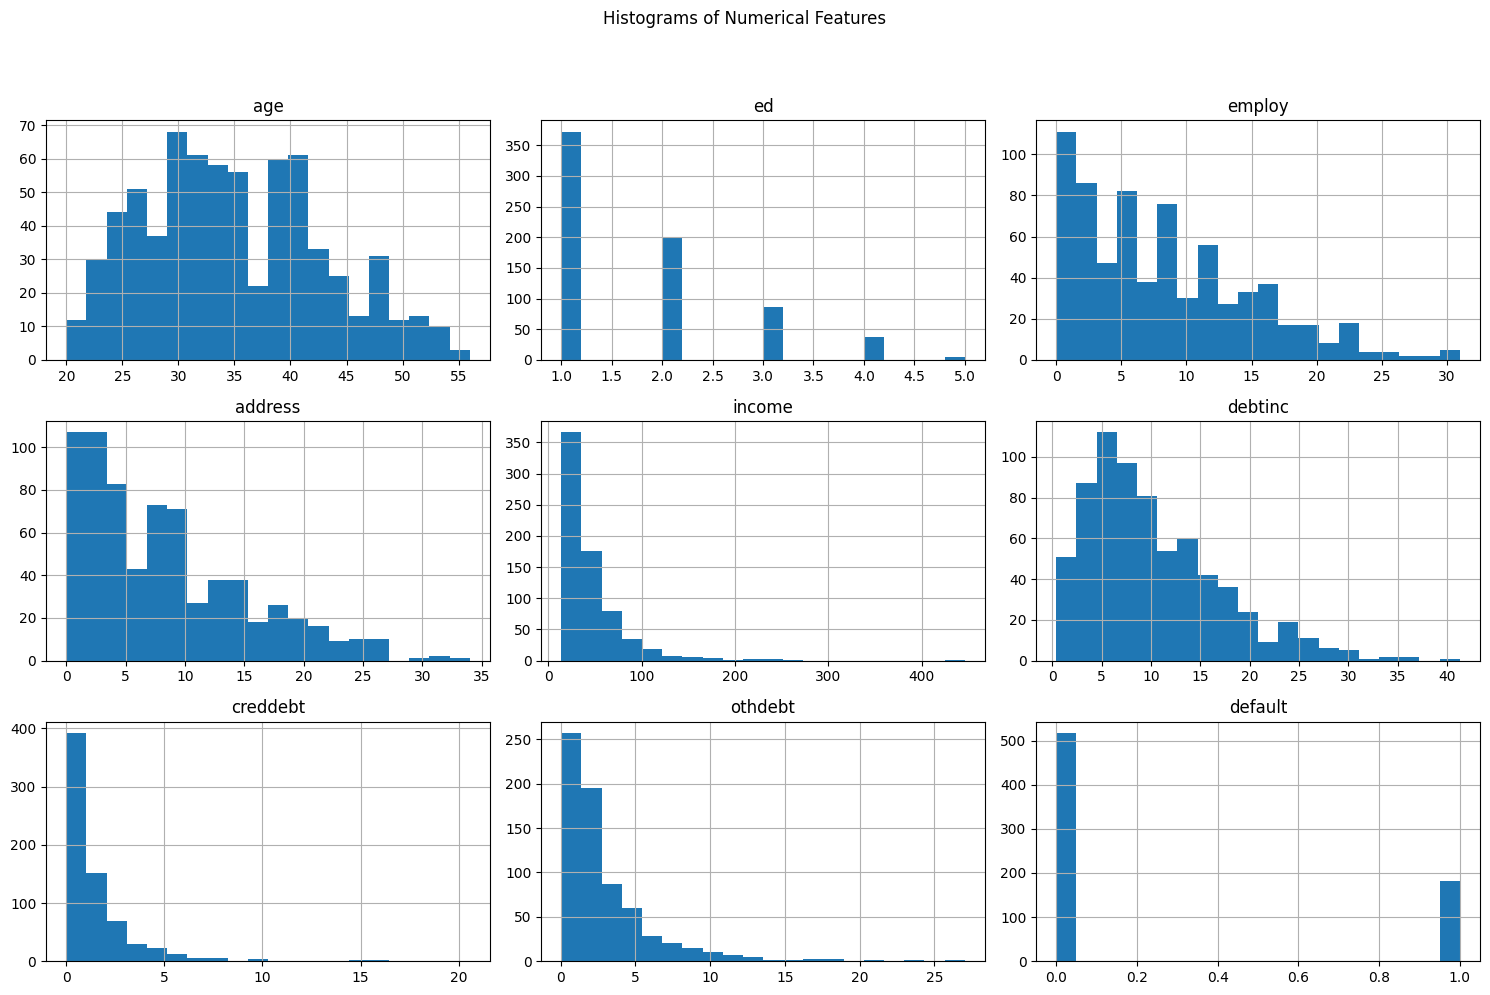

In [17]:
print("\n--- Visualizations (Distributions and Relationships) ---")
 # Histogram for numerical features
df.hist(figsize=(15, 10), bins=20)
plt.suptitle('Histograms of Numerical Features', y=1.02)
plt.tight_layout(rect=[0, 0.03, 1, 0.98]) # Adjust layout to prevent title overlap
plt.show()

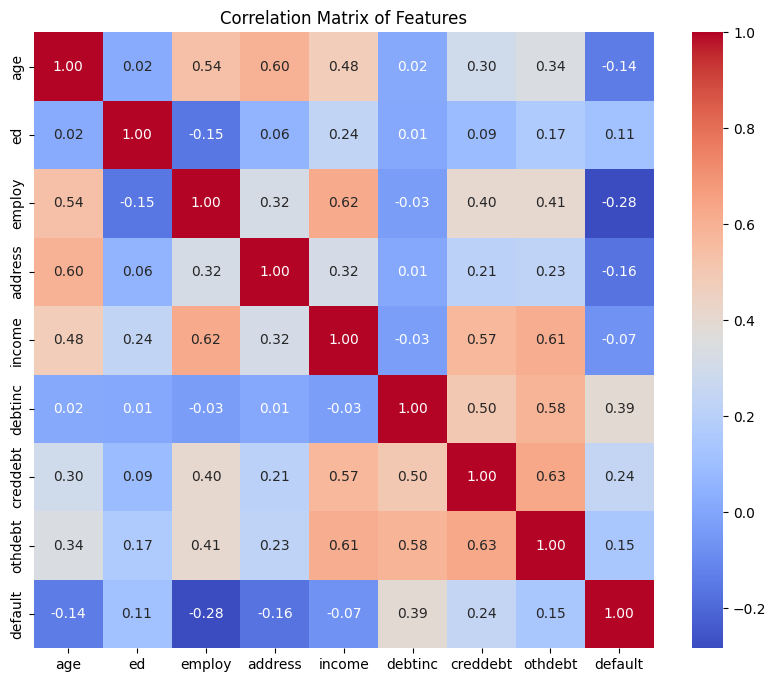

In [18]:
# Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features')
plt.show()

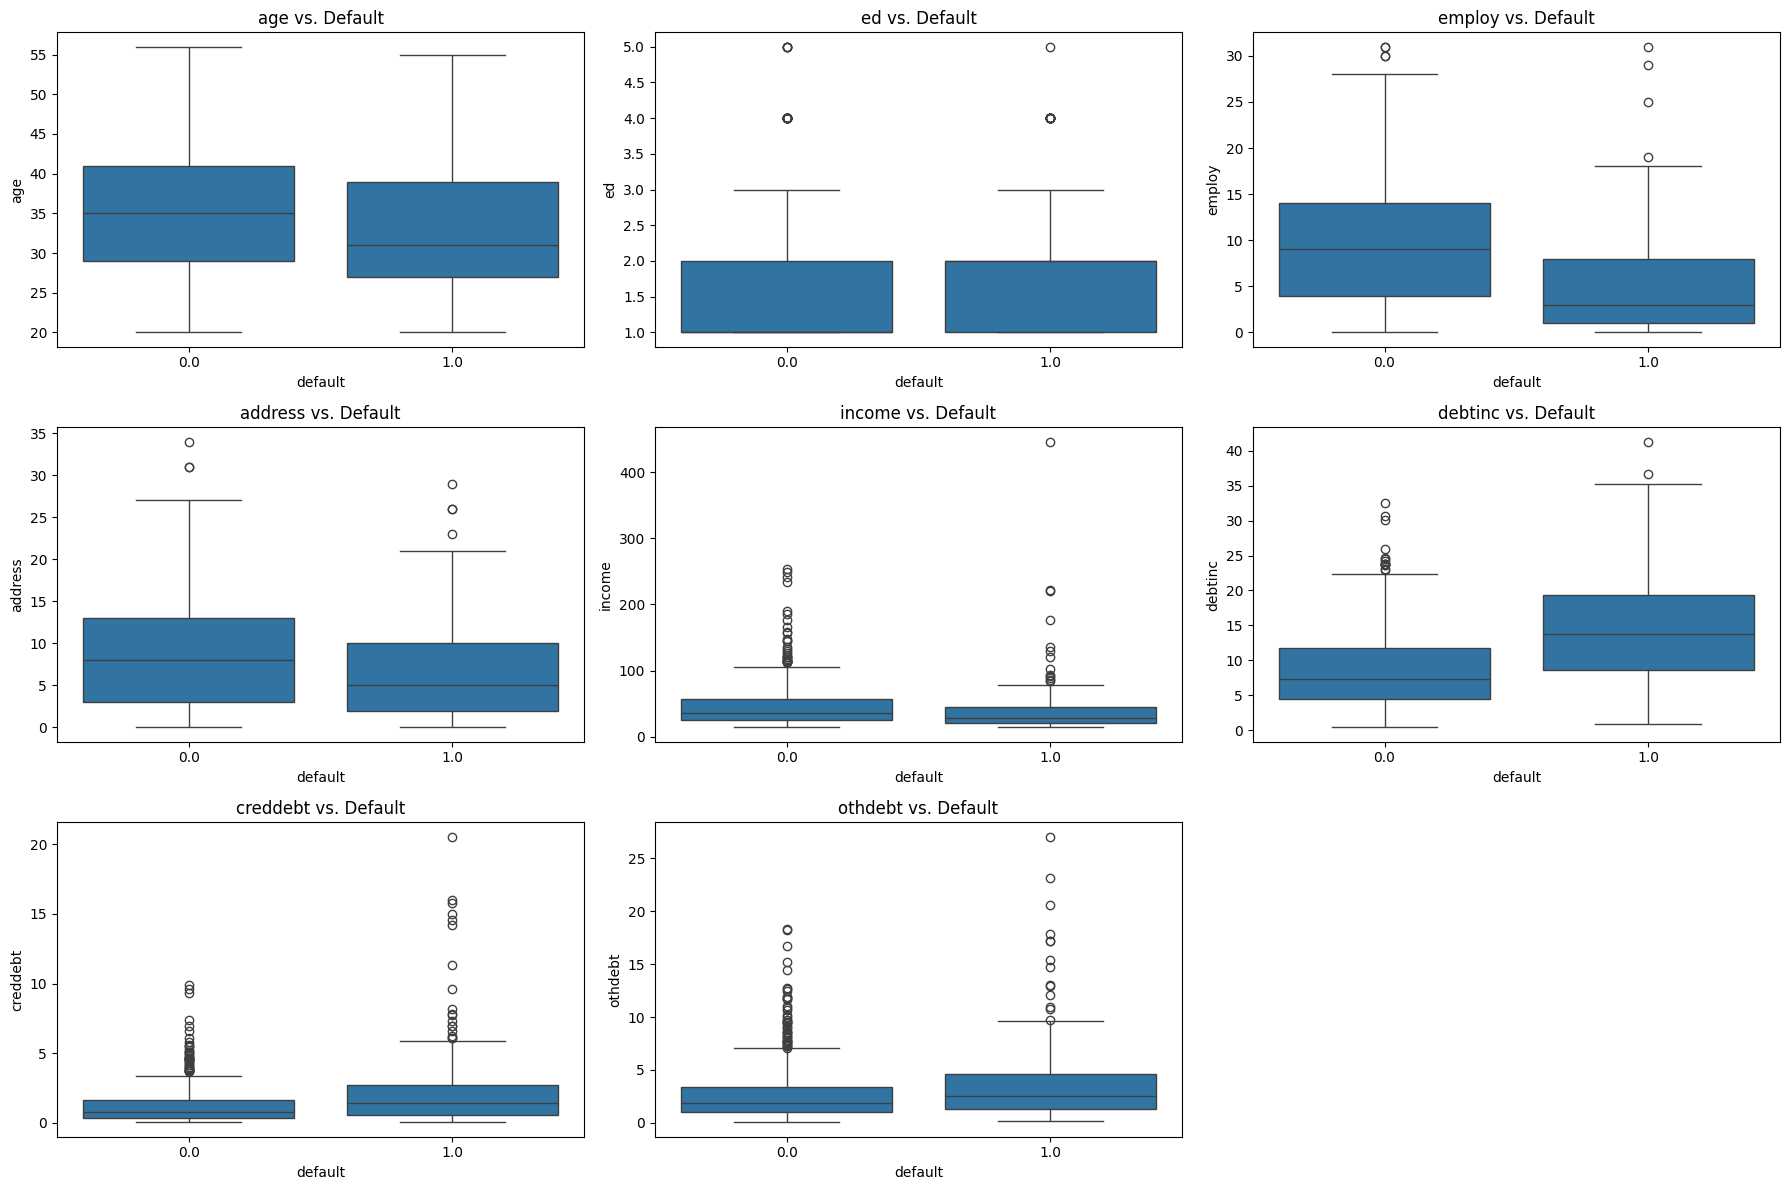

In [20]:
# Relationship with Target Variable ('default')
# Using box plots for numerical features vs. default status
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
numerical_cols.remove('default') # Remove target variable itself

plt.figure(figsize=(18, 12))
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(x='default', y=col, data=df)
    plt.title(f'{col} vs. Default')
plt.tight_layout()
plt.show()

# **Task 2: Feature Engineering**

In [21]:
# Create new features based on existing data
print("\n--- Feature Engineering ---")


--- Feature Engineering ---


In [22]:
# 1. Total Debt: Sum of credit card debt and other debt
df['total_debt'] = df['creddebt'] + df['othdebt']
print("Created 'total_debt' feature.")
# Rationale: A single feature combining all debt might
# be more indicative of financial strain than separate components.

Created 'total_debt' feature.


In [23]:
# 2. Debt-to-Income Ratio squared: Amplify the impact of high debt-to-income
# Note: debtinc is already debt-to-income. Squaring it can highlight extreme values.
df['debtinc_sq'] = df['debtinc']**2
print("Created 'debtinc_sq' feature.")
# Rationale: Non-linear relationships might exist where very high debt-to-income
# disproportionately increases default risk.


Created 'debtinc_sq' feature.


In [24]:
# 3. Income per Employment Year: How much income per year worked
# Add a small constant to 'employ' to avoid division by zero if there are individuals with 0 employment years.
df['income_per_employ_year'] = df['income'] / (df['employ'] + 1e-6)
print("Created 'income_per_employ_year' feature.")
# Rationale: This could indicate financial stability or career progression relative to experience.

Created 'income_per_employ_year' feature.


In [25]:
# 4. Age and Employment Interaction: Interaction term
df['age_employ_interaction'] = df['age'] * df['employ']
print("Created 'age_employ_interaction' feature.")
# Rationale: Older, more experienced individuals might have different default patterns.

Created 'age_employ_interaction' feature.


In [26]:
print("\nDataFrame head after feature engineering:")
print(df.head())


DataFrame head after feature engineering:
   age  ed  employ  address  income  debtinc   creddebt   othdebt  default  \
0   41   3      17       12     176      9.3  11.359392  5.008608      1.0   
1   27   1      10        6      31     17.3   1.362202  4.000798      0.0   
2   40   1      15       14      55      5.5   0.856075  2.168925      0.0   
3   41   1      15       14     120      2.9   2.658720  0.821280      0.0   
4   24   2       2        0      28     17.3   1.787436  3.056564      1.0   

   total_debt  debtinc_sq  income_per_employ_year  age_employ_interaction  
0      16.368       86.49               10.352941                     697  
1       5.363      299.29                3.100000                     270  
2       3.025       30.25                3.666666                     600  
3       3.480        8.41                7.999999                     615  
4       4.844      299.29               13.999993                      48  


In [27]:
# --- Scaling Numerical Features ---
# Apply Min-Max Scaling to numerical features (including new ones)
from sklearn.preprocessing import MinMaxScaler

print("\n--- Scaling Numerical Features ---")
# Identify numerical columns for scaling (excluding the 'default' target)
numerical_features = df.select_dtypes(include=np.number).columns.tolist()
numerical_features.remove('default')

scaler = MinMaxScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])
print("Numerical features scaled using MinMaxScaler.")

print("\nDataFrame head after scaling:")
print(df.head())

print("\nTask 2: Feature Engineering and Scaling completed.")


--- Scaling Numerical Features ---
Numerical features scaled using MinMaxScaler.

DataFrame head after scaling:
        age    ed    employ   address    income   debtinc  creddebt   othdebt  \
0  0.583333  0.50  0.548387  0.352941  0.375000  0.217604  0.552210  0.183897   
1  0.194444  0.00  0.322581  0.176471  0.039352  0.413203  0.065719  0.146554   
2  0.555556  0.00  0.483871  0.411765  0.094907  0.124694  0.041090  0.078677   
3  0.583333  0.00  0.483871  0.411765  0.245370  0.061125  0.128811  0.028742   
4  0.111111  0.25  0.064516  0.000000  0.032407  0.413203  0.086412  0.111567   

   default  total_debt  debtinc_sq  income_per_employ_year  \
0      1.0    0.418932    0.050618            1.240896e-07   
1      0.0    0.135079    0.175388            2.047619e-08   
2      0.0    0.074774    0.017643            2.857143e-08   
3      0.0    0.086510    0.004837            9.047619e-08   
4      1.0    0.121692    0.175388            1.761904e-07   

   age_employ_interaction  

# **Task 3: Model Building and Evaluation**


This task involves splitting the data, training your chosen model (Random Forest), and evaluating its performance thoroughly.

In [28]:
# Define features (X) and target (y)
# 'default' is the target variable
X = df.drop('default', axis=1)
y = df['default']

In [29]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(f"\nData split: X_train shape {X_train.shape}, X_test shape {X_test.shape}")


Data split: X_train shape (560, 12), X_test shape (140, 12)


In [30]:
# Train a Random Forest Classifier
print("\n--- Model Training (Random Forest) ---")
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
# Using class_weight='balanced' is important for imbalanced datasets often found in default prediction.
rf_model.fit(X_train, y_train)
print("Random Forest model trained.")


--- Model Training (Random Forest) ---
Random Forest model trained.


In [31]:
# Make predictions on the test set
y_pred = rf_model.predict(X_test)
y_pred_proba = rf_model.predict_proba(X_test)[:, 1] # Probabilities for the positive class

In [32]:
# --- Evaluate the Model ---
print("\n--- Model Evaluation ---")

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")


--- Model Evaluation ---
Accuracy: 0.7929



Confusion Matrix:
[[93 10]
 [19 18]]


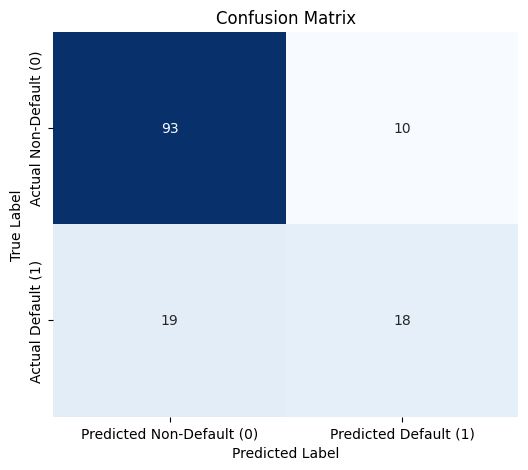

In [33]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Non-Default (0)', 'Predicted Default (1)'],
            yticklabels=['Actual Non-Default (0)', 'Actual Default (1)'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [34]:
# Classification Report (Precision, Recall, F1-Score)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

         0.0       0.83      0.90      0.87       103
         1.0       0.64      0.49      0.55        37

    accuracy                           0.79       140
   macro avg       0.74      0.69      0.71       140
weighted avg       0.78      0.79      0.78       140



In [35]:
# --- Analyze Feature Importance ---
print("\n--- Feature Importance ---")
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)
print("Top 10 Feature Importances:")
print(feature_importances.head(10))


--- Feature Importance ---
Top 10 Feature Importances:
income_per_employ_year    0.126969
debtinc                   0.116035
debtinc_sq                0.110841
age_employ_interaction    0.109218
creddebt                  0.103995
total_debt                0.080075
employ                    0.075988
age                       0.070366
othdebt                   0.065121
address                   0.061473
dtype: float64


/tmp/ipython-input-36-4251733825.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances.head(15), y=feature_importances.head(15).index, palette='viridis')


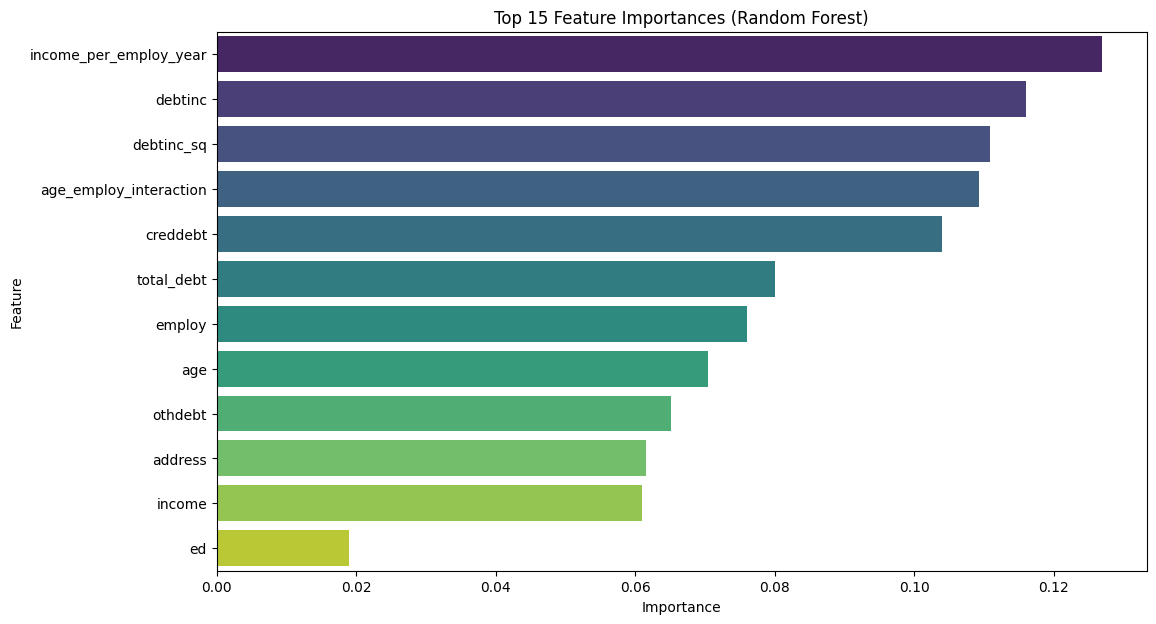


Task 3: Model Building and Evaluation completed.


In [36]:
plt.figure(figsize=(12, 7))
sns.barplot(x=feature_importances.head(15), y=feature_importances.head(15).index, palette='viridis')
plt.title('Top 15 Feature Importances (Random Forest)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

print("\nTask 3: Model Building and Evaluation completed.")

# **Task 4: Explainability and Fairness Analysis**


This task uses SHAP for explainability and Fairlearn for fairness assessment.

In [ ]:
import shap
explainer = shap.TreeExplainer(rf)
shap_vals = explainer.shap_values(X_test)
shap.summary_plot(shap_vals[1], X_test)

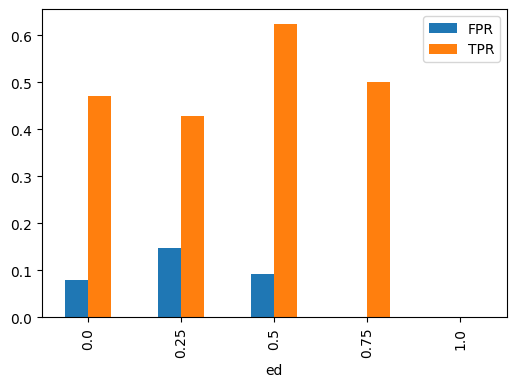

In [54]:
from fairlearn.metrics import MetricFrame, false_positive_rate, true_positive_rate
metric_frame = MetricFrame(metrics={'FPR': false_positive_rate, 'TPR': true_positive_rate},
                           y_true=y_test, y_pred=y_pred,
                           sensitive_features=df.loc[X_test.index,'ed'])  # education as sensitive feature
metric_frame.by_group.plot.bar(figsize=(6,4)); plt.show()